# Grouping Creating Visualizations for the flag Columns

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [91]:
path = r'Desktop/CF/Achievement 4/Instacart Basket Analysis/02 Data/Prepared Data/df_cust_Merge_4.9.pkl'

In [93]:
path_orig = r'Desktop/CF/Achievement 4/Instacart Basket Analysis'

In [23]:
df = pd.read_pickle(os.path.join(path))

In [27]:
df['Dependants'].dtype

dtype('int64')

In [4]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'orders_days_since_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'max_order', 'loyalty_flag', 'Average_order',
       'Spending_flag', 'median_order', 'Frequency_flag', 'First Name',
       'Last Name', 'Gender', 'State', 'Age', 'date_joined', 'Dependants',
       'Marital_Status', 'income', '_merge'],
      dtype='object')

## Creating a Subset

In [6]:
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [7]:
big = df[dev]
small = df[~dev]

In [8]:
df_Sub = small

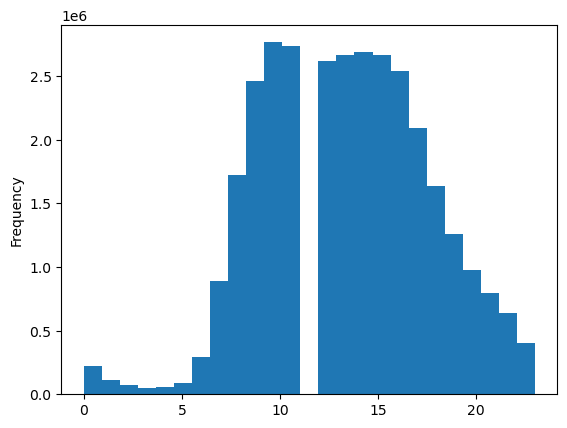

In [85]:
hist = df['order_hour_of_day'].plot.hist(bins = 25)

## This Histogram represents The frequency of orders within each time frame. Around 8-9 we see a great deal of orders

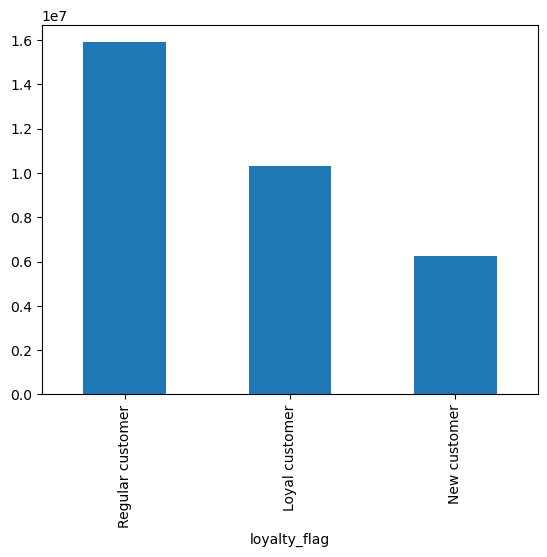

In [86]:
bar = df['loyalty_flag'].value_counts().plot.bar()

## This line graph represents the hour where customers spend the most money

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


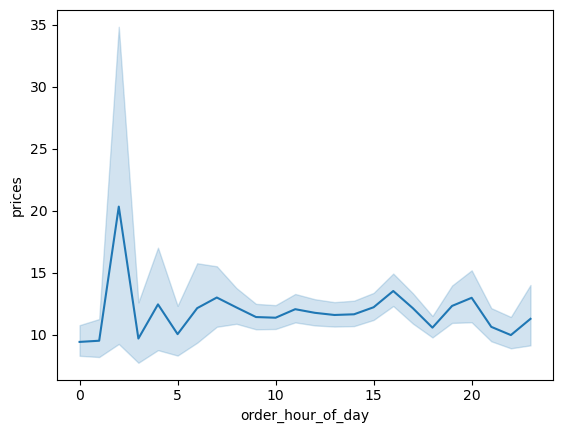

In [89]:
line = sns.lineplot(data = df_Sub, x = 'order_hour_of_day',y = 'prices')

## This scatter plot represents the correlation between age and income

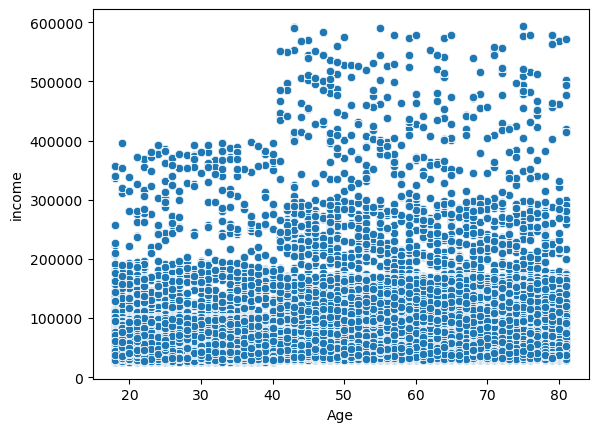

In [87]:
Scatter = sns.scatterplot(x = 'Age', y = 'income',data = df)

In [15]:
# the higher the age the higher the spending power

In [29]:
df_sub_lin = small[['Age','Dependants']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


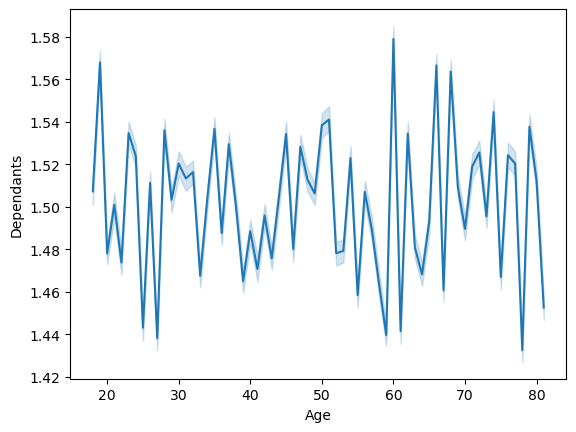

In [88]:
line2 = sns.lineplot(data = df_sub_lin, x = 'Age',y = 'Dependants')

## In this line chart the dependants are showing decimal points, but the chart is still very telling at how there is no real relation 
## between Age and dependants.

In [64]:

df['Dependants'].value_counts()

Dependants
3    8142318
0    8105197
2    8098387
1    8088310
Name: count, dtype: int64

In [84]:
df.groupby('Age').agg({'Dependants': ['median']})

,Dependants
,median
Age,
18,1.0
19,2.0
20,1.0
21,2.0
22,1.0
...,...
77,2.0
78,1.0


In [79]:
df_A_D.head(50)

Age
18    1.0
19    2.0
20    1.0
21    2.0
22    1.0
23    2.0
24    1.0
25    1.0
26    2.0
27    1.0
28    2.0
29    2.0
30    2.0
31    2.0
32    2.0
33    1.0
34    2.0
35    2.0
36    1.0
37    2.0
38    1.0
39    1.0
40    1.0
41    1.0
42    1.0
43    1.0
44    2.0
45    2.0
46    1.0
47    2.0
48    1.0
49    2.0
50    2.0
51    2.0
52    1.0
53    1.0
54    2.0
55    1.0
56    1.0
57    1.0
58    1.0
59    1.0
60    2.0
61    1.0
62    2.0
63    1.0
64    1.0
65    2.0
66    2.0
67    1.0
Name: Dependants, dtype: float64

In [95]:
hist.figure.savefig(os.path.join(path_orig, '04 Analysis','Visualizations', 'df_hist.png'))
bar.figure.savefig(os.path.join(path_orig, '04 Analysis','Visualizations', 'df_bar.png'))
Scatter.figure.savefig(os.path.join(path_orig, '04 Analysis','Visualizations', 'df_scatter.png'))
line.figure.savefig(os.path.join(path_orig, '04 Analysis','Visualizations', 'df_line.png'))
line2.figure.savefig(os.path.join(path_orig, '04 Analysis','Visualizations', 'df_line2.png'))